In [12]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt


In [2]:
# URL do endpoint
url = "https://geradordevendas.fly.dev/historico/0/200"

# Requisição GET
response = requests.get(url)

if response.status_code == 200:
    data = response.json()

In [3]:
responses = {}
data = {}

for i in range(1, 40):
    responses[i] = requests.get(url)
    data[i] = responses[i].json()


In [4]:
data_ = {}

for i in range (1,40):
    data_[i] = data[i]

In [5]:
# Inicializa dicionários vazios
rows_ = {}
df_vendas_ = {}

for i in range(1, 40):
    # Inicializa uma lista de vendas para cada índice i
    rows_[i] = []  

    # Extraindo dados conforme a estrutura fornecida
    for venda in data_[i]['vendas']:
        cliente_id = venda['cliente']['id'] if venda['cliente']['id'] else 9999
        cliente_nome = venda['cliente']['nome'] if venda['cliente']['nome'] else 'não identificado'
        meio = venda['meio']
        transaction_id = venda['transaction_id']

        for item in venda['itens']:
            item_nome = item['item']
            preco = item['preço']
            categoria = item['categoria']

            # Adicionando uma linha para cada item no rows_[i]
            rows_[i].append({  
                'id': cliente_id,
                'nome': cliente_nome,
                'item': item_nome,
                'preço': preco,
                'categoria': categoria,
                'meio': meio,
                'transaction_id': transaction_id
            })

    # Convertendo as linhas para um DataFrame do pandas
    # Cria o nome dinâmico da variável, ex: df_vendas_1, df_vendas_2, etc.
    nome_df = f'df_vendas_{i}'
    globals()[nome_df] = pd.DataFrame(rows_[i])  # Cria a variável dinamicamente no escopo global


In [6]:
vendas = []

# Loop de 1 a 3 para acessar os DataFrames df_vendas_1, df_vendas_2, df_vendas_3
for i in range(1, 40):  
    # Acessa o DataFrame dinâmico (df_vendas_1, df_vendas_2, etc.) usando globals()
    df = globals()[f'df_vendas_{i}']
    soma = df['preço'].sum().round(2)
    vendas.append(soma)

In [7]:
vendas

[np.float64(22373.96),
 np.float64(22827.55),
 np.float64(21273.8),
 np.float64(21741.95),
 np.float64(22788.08),
 np.float64(23269.2),
 np.float64(21573.65),
 np.float64(23161.59),
 np.float64(21451.18),
 np.float64(21475.66),
 np.float64(22121.83),
 np.float64(22503.9),
 np.float64(22352.91),
 np.float64(21782.87),
 np.float64(21521.99),
 np.float64(21854.53),
 np.float64(21885.51),
 np.float64(21918.36),
 np.float64(23259.26),
 np.float64(21187.49),
 np.float64(21501.03),
 np.float64(20742.76),
 np.float64(21964.7),
 np.float64(20294.37),
 np.float64(22215.08),
 np.float64(21733.77),
 np.float64(21958.97),
 np.float64(21044.62),
 np.float64(21507.09),
 np.float64(21228.62),
 np.float64(21669.3),
 np.float64(23069.52),
 np.float64(21242.77),
 np.float64(21424.1),
 np.float64(20668.45),
 np.float64(21999.1),
 np.float64(21334.77),
 np.float64(22410.7),
 np.float64(21459.72)]

In [8]:
df_venda_diaria = pd.DataFrame(vendas, columns=['venda_diaria'])

# Cria datas
date_range = pd.date_range(start='2024-01-01', periods=len(df_venda_diaria), freq='D')

df_venda_diaria.index = date_range

df_venda_diaria

,venda_diaria
2024-01-01,22373.96
2024-01-02,22827.55
2024-01-03,21273.80
2024-01-04,21741.95
2024-01-05,22788.08
2024-01-06,23269.20
2024-01-07,21573.65
2024-01-08,23161.59
2024-01-09,21451.18
2024-01-10,21475.66


<Axes: >

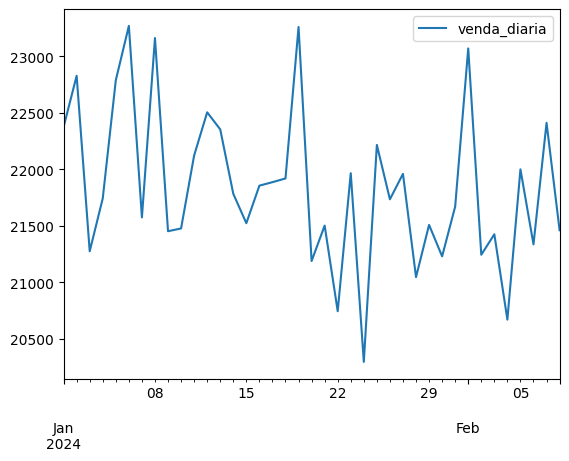

In [9]:
df_venda_diaria.plot()

In [10]:
train_size = int(len(df_venda_diaria) * 0.8)
train, test = df_venda_diaria[:train_size], df_venda_diaria[train_size:]


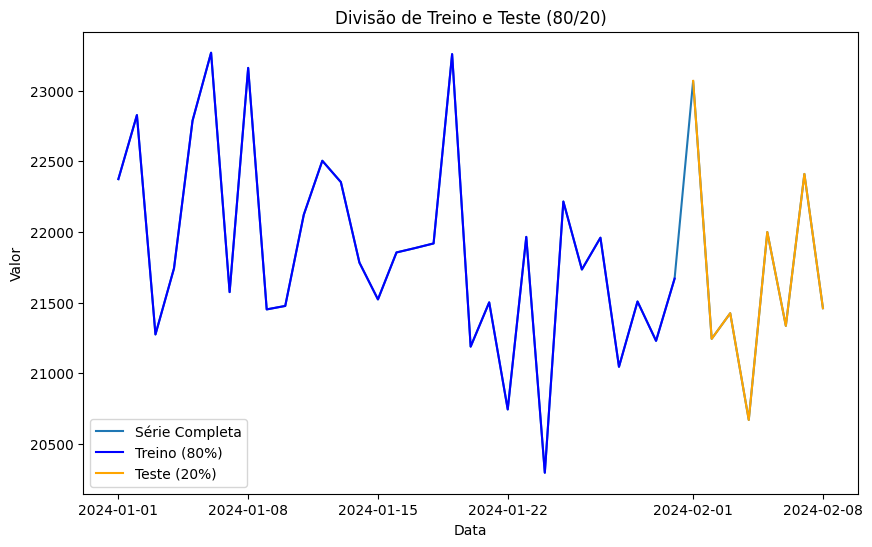

In [13]:
# Visualizar a divisão
plt.figure(figsize=(10, 6))
plt.plot(df_venda_diaria, label='Série Completa')
plt.plot(train, label='Treino (80%)', color='blue')
plt.plot(test, label='Teste (20%)', color='orange')
plt.title('Divisão de Treino e Teste (80/20)')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [14]:
from statsmodels.tsa.arima.model import ARIMA

In [23]:
params = {'endog': train,
        'order': [1,1,1]}

In [25]:

model = ARIMA(**params)
model_fit = model.fit()

In [26]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           venda_diaria   No. Observations:                   31
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -248.774
Date:                Thu, 19 Dec 2024   AIC                            503.547
Time:                        15:08:48   BIC                            507.751
Sample:                    01-01-2024   HQIC                           504.892
                         - 01-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3049      0.556      0.548      0.584      -0.786       1.395
ma.L1         -0.4298      0.557     -0.771      0.441      -1.522       0.662
sigma2      8.678e+05   2.76e+05      3.149      0.0

In [27]:
forecast = model_fit.forecast(steps=len(test))

In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.4f}")

RMSE: 709.8925


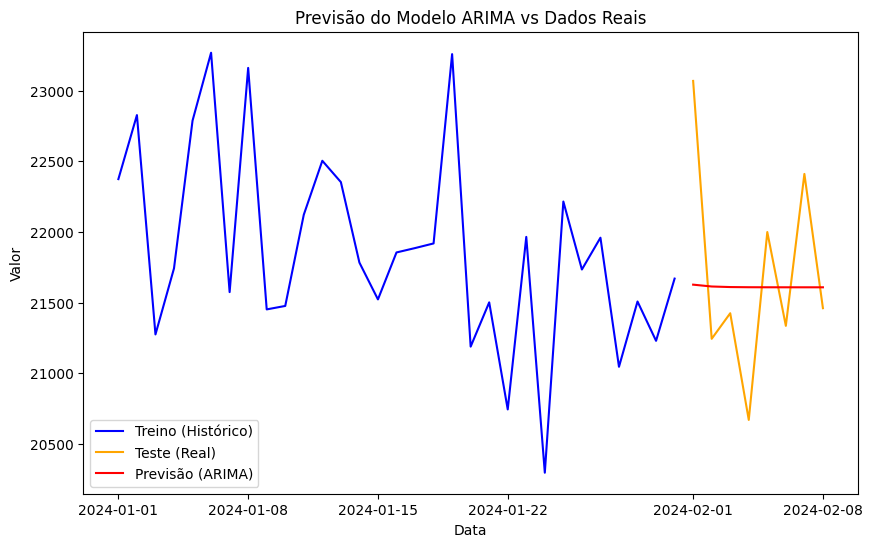

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(train, label='Treino (Histórico)', color='blue')
plt.plot(test, label='Teste (Real)', color='orange')
plt.plot(test.index, forecast, label='Previsão (ARIMA)', color='red')
plt.title('Previsão do Modelo ARIMA vs Dados Reais')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()